# Image in spatial and frequency domain

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.misc import bytescale
import matplotlib.image as mpimg

In [10]:
# loading image
img = mpimg.imread('i/super_mario_head.png')

# 128 x 128 slice (power of 2)
img_slice = img[90:218,90:218,2]

resolution = 128

# DCT freq and Inversed DCT image

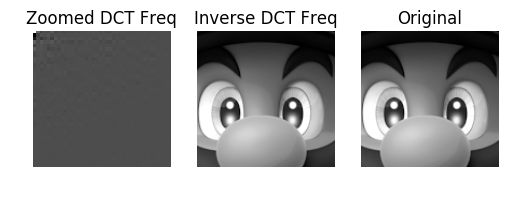

In [11]:
# transform
dct_slice = fftpack.dct(fftpack.dct(img_slice.T, norm='ortho').T, norm='ortho')
# inverse transform
idct_slice = fftpack.idct(fftpack.idct(dct_slice.T, norm='ortho').T, norm='ortho')

f, (plt1, plt2, plt3) = plt.subplots(1, 3)

plt1.axis('off');plt1.set_title('Zoomed DCT Freq');plt1.imshow(dct_slice[0:40,0:40], cmap='gray', interpolation='nearest');
plt2.axis('off');plt2.set_title('Inverse DCT Freq');plt2.imshow(idct_slice, cmap='gray');
plt3.axis('off');plt3.set_title('Original');plt3.imshow(img_slice, cmap='gray');

# Discarding 80% of the coefficients

80% of the coefficients were discarded.


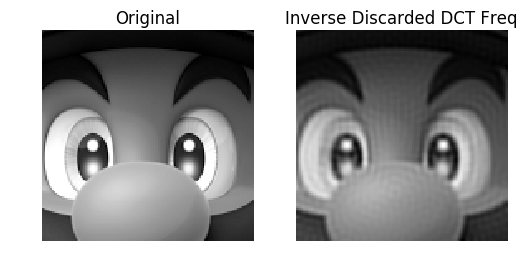

In [12]:
# copying dct
dct_slice_copy = np.copy(dct_slice)

# top left triangle to retain
triangle = (50/100) * resolution

# only discard greater than threshold
threshold = 0.0019

discarded_coefficients = 0

for x in range(resolution):
    for y in range(resolution):
        if ((x +  y) > triangle) and (abs(dct_slice_copy[x, y]) > threshold):
            dct_slice_copy[x, y] = 0
            discarded_coefficients += 1

            
idct_slice = fftpack.idct(fftpack.idct(dct_slice_copy.T, norm='ortho').T, norm='ortho')

f, (plt1, plt2) = plt.subplots(1, 2)

plt1.axis('off');plt1.set_title('Original');plt1.imshow(img_slice, cmap='gray', interpolation='nearest')
plt2.axis('off');plt2.set_title('Inverse Discarded DCT Freq');plt2.imshow(idct_slice, cmap='gray', interpolation='nearest')


print("%d%% of the coefficients were discarded." % ((discarded_coefficients / (resolution*resolution)) * 100))

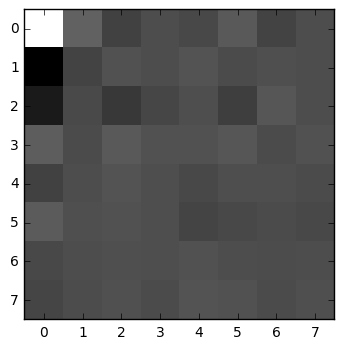

In [13]:
plt.imshow(dct_slice[0:8,0:8], cmap='gray', interpolation='nearest')

In [14]:
bytescale(dct_slice[0:8,0:8])

array([[255,  99,  67,  77,  72,  89,  67,  77],
       [  0,  67,  82,  77,  83,  75,  79,  77],
       [ 27,  75,  56,  70,  78,  62,  86,  78],
       [ 93,  75,  90,  82,  82,  86,  75,  81],
       [ 66,  78,  83,  78,  72,  78,  78,  76],
       [ 92,  79,  82,  78,  68,  72,  75,  72],
       [ 73,  77,  79,  79,  81,  77,  76,  78],
       [ 69,  76,  80,  76,  83,  82,  75,  79]], dtype=uint8)